<a href="https://colab.research.google.com/github/PurnaPrakashNissy10/PurnaPrakashNissy10/blob/main/Socialmediaanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('social_media_usage.csv')
data.head()

,User_ID,App,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Pinterest,288,16,94,0
1,U_2,Facebook,192,14,117,15
2,U_3,Instagram,351,13,120,48
3,U_4,TikTok,21,20,117,8
4,U_5,LinkedIn,241,16,9,21


In [2]:
print("Missing values:\n", data.isnull().sum())
print("Data Types:\n", data.dtypes)
data.describe()

Missing values:
 User_ID                0
App                    0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64
Data Types:
 User_ID                object
App                    object
Daily_Minutes_Spent     int64
Posts_Per_Day           int64
Likes_Per_Day           int64
Follows_Per_Day         int64
dtype: object


,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,247.368000,10.269000,94.682000,24.698000
std,146.371921,6.121774,57.560943,14.842948
min,5.000000,0.000000,0.000000,0.000000
25%,112.750000,5.000000,44.750000,12.000000
50%,246.000000,10.000000,94.000000,24.000000
75%,380.500000,16.000000,142.000000,38.000000
max,500.000000,20.000000,200.000000,50.000000


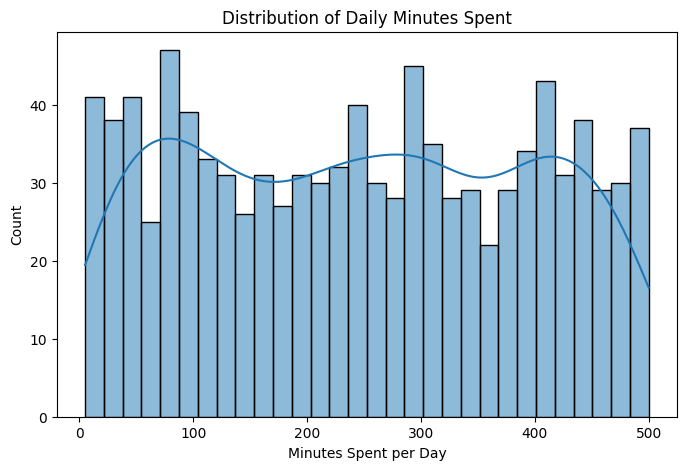

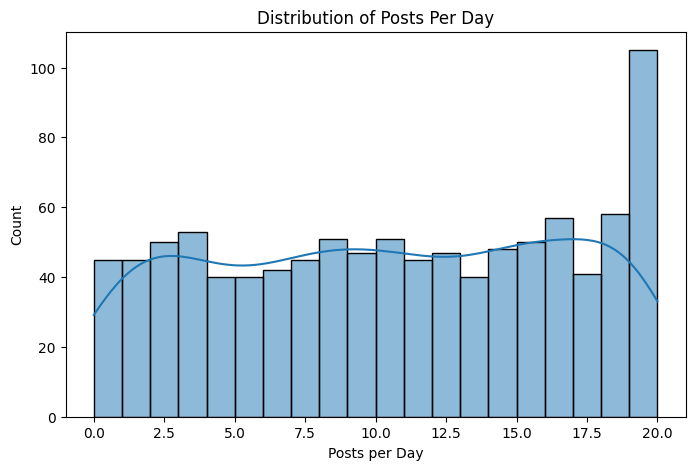

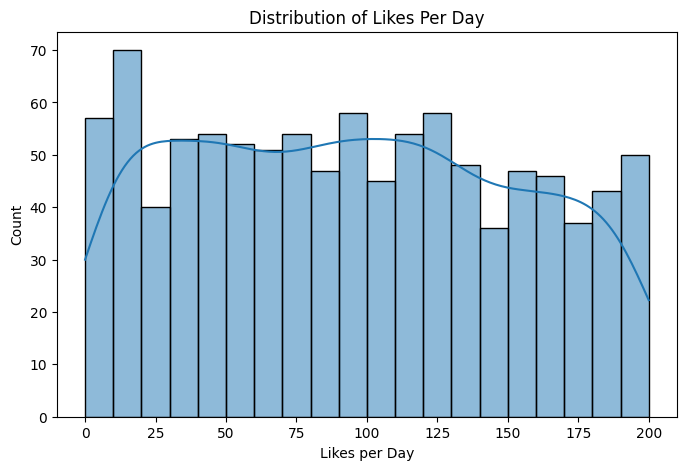

In [3]:
# Distribution of Daily Minutes Spent
plt.figure(figsize=(8,5))
sns.histplot(data['Daily_Minutes_Spent'], bins=30, kde=True)
plt.title("Distribution of Daily Minutes Spent")
plt.xlabel("Minutes Spent per Day")
plt.show()

# Distribution of Posts Per Day
plt.figure(figsize=(8,5))
sns.histplot(data['Posts_Per_Day'], bins=20, kde=True)
plt.title("Distribution of Posts Per Day")
plt.xlabel("Posts per Day")
plt.show()

# Distribution of Likes Per Day
plt.figure(figsize=(8,5))
sns.histplot(data['Likes_Per_Day'], bins=20, kde=True)
plt.title("Distribution of Likes Per Day")
plt.xlabel("Likes per Day")
plt.show()


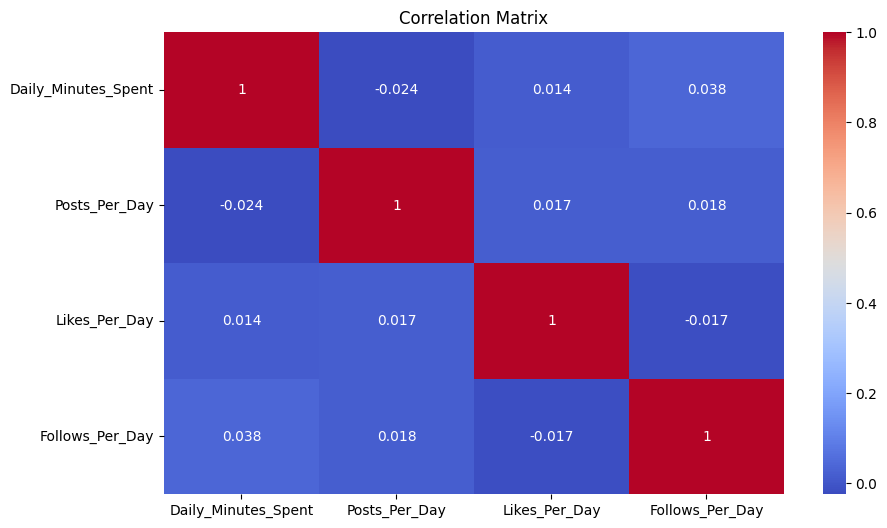

In [5]:
# Correlation heatmap with only numeric columns
plt.figure(figsize=(10, 6))
numeric_data = data.select_dtypes(include=np.number)  # Selects only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



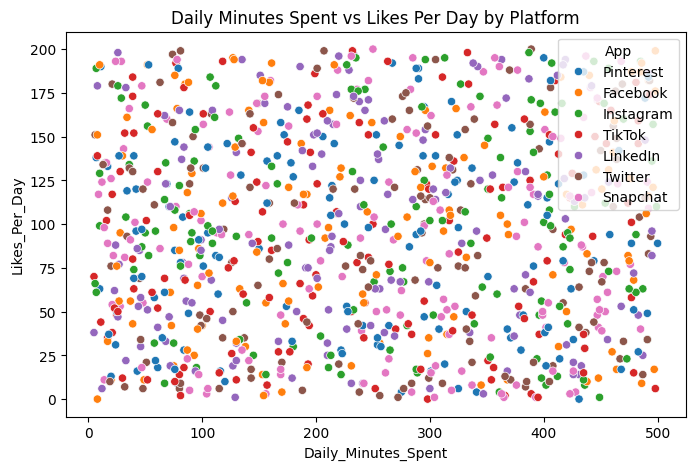

In [6]:
# Convert Daily_Minutes_Spent and Likes_Per_Day to numeric if not already
data['Daily_Minutes_Spent'] = pd.to_numeric(data['Daily_Minutes_Spent'], errors='coerce')
data['Likes_Per_Day'] = pd.to_numeric(data['Likes_Per_Day'], errors='coerce')

# Scatter plot for Daily Minutes Spent vs Likes Per Day
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Daily_Minutes_Spent', y='Likes_Per_Day', hue='App')
plt.title("Daily Minutes Spent vs Likes Per Day by Platform")
plt.show()


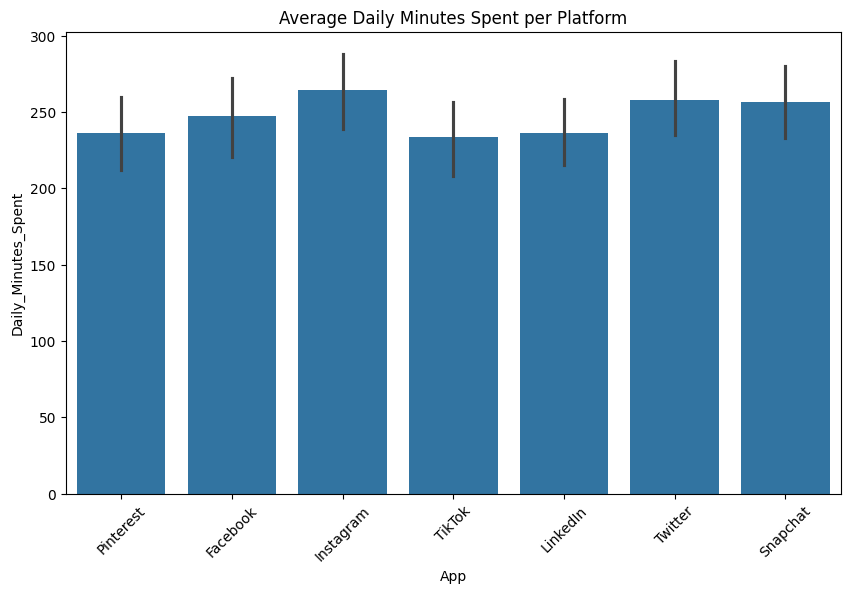

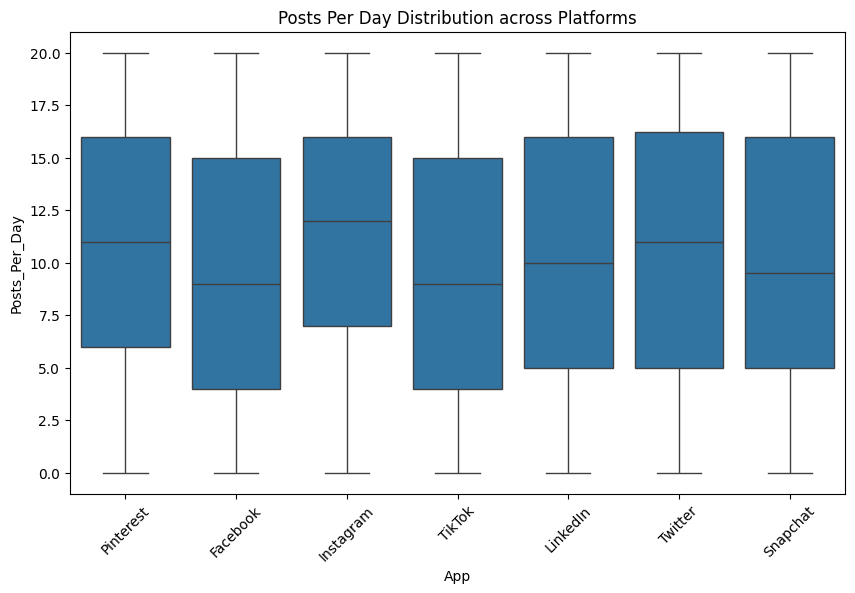

In [9]:
# Average Daily Minutes Spent on each platform
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='App', y='Daily_Minutes_Spent', estimator=np.mean)
plt.title("Average Daily Minutes Spent per Platform")
plt.xticks(rotation=45)
plt.show()

# Posts per Day across platforms
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='App', y='Posts_Per_Day')
plt.title("Posts Per Day Distribution across Platforms")
plt.xticks(rotation=45)
plt.show()


In [10]:
# Engagement patterns by platform
engagement_summary = data.groupby('App').agg({
    'Daily_Minutes_Spent': 'mean',
    'Likes_Per_Day': 'mean',
    'Follows_Per_Day': 'mean'
}).sort_values(by='Daily_Minutes_Spent', ascending=False)
print("Engagement Summary:\n", engagement_summary)


Engagement Summary:
            Daily_Minutes_Spent  Likes_Per_Day  Follows_Per_Day
App                                                           
Instagram           264.100000      98.992857        25.864286
Twitter             257.685714      90.185714        23.928571
Snapchat            256.551282      93.820513        25.506410
Facebook            247.169118      99.301471        23.117647
Pinterest           236.207143      92.114286        24.792857
LinkedIn            236.054422      97.081633        25.081633
TikTok              233.418440      91.411348        24.439716


In [11]:
# Top active users based on posts and followers gained
top_active_users = data.nlargest(10, ['Posts_Per_Day', 'Follows_Per_Day'])
print("Top Active Users:\n", top_active_users[['User_ID', 'App', 'Posts_Per_Day', 'Follows_Per_Day']])


Top Active Users:
     User_ID        App  Posts_Per_Day  Follows_Per_Day
753   U_754   Snapchat             20               50
825   U_826   Snapchat             20               50
963   U_964   Facebook             20               50
628   U_629   Facebook             20               46
120   U_121   Snapchat             20               45
802   U_803   Snapchat             20               45
820   U_821  Instagram             20               45
69     U_70  Instagram             20               43
93     U_94   Snapchat             20               42
165   U_166  Instagram             20               42


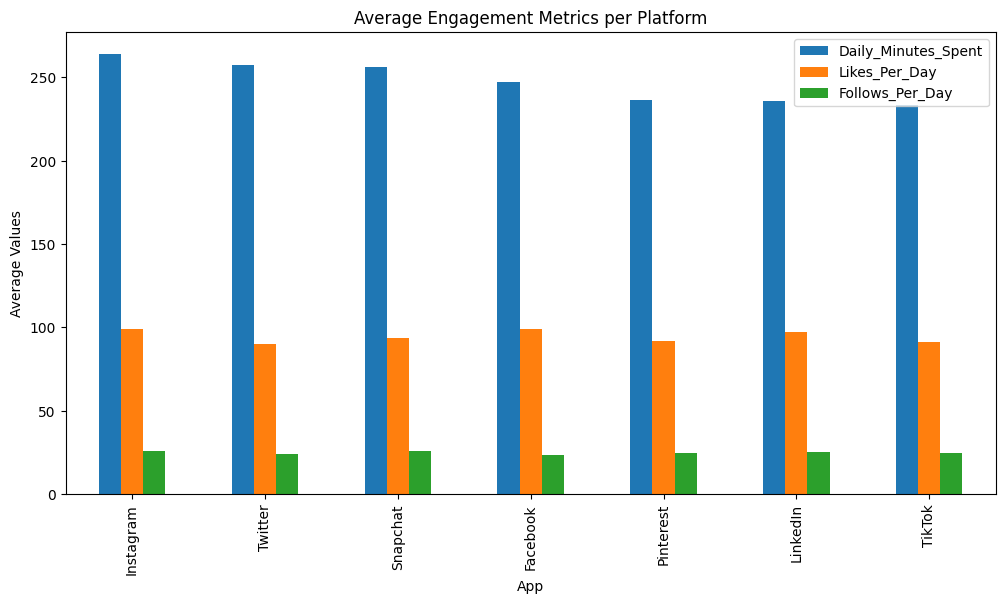

In [12]:
# Plotting the engagement summary
engagement_summary.plot(kind='bar', figsize=(12,6))
plt.title("Average Engagement Metrics per Platform")
plt.ylabel("Average Values")
plt.show()
